In [3]:
%matplotlib inline
pd.options.display.max_columns = 150

In [4]:
data = pd.read_csv("player2.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=30]
data = data[data["Min"]>=10]
data.shape

(6929, 152)

In [5]:
data = data.reset_index()
del data["index"]

In [6]:
np.array(data.columns)

array(['Player', 'Team', 'Season', 'Season Type', 'Games',
       'Above the Break 3-Usage', 'Mid-Range-Usage',
       'In The Paint (Non-RA)-Usage', 'Restricted Area-Usage',
       'Right Corner 3-Usage', 'Left Corner 3-Usage', 'Backcourt-Usage',
       'Above the Break 3 %', 'Mid-Range %', 'In The Paint (Non-RA) %',
       'Restricted Area %', 'Right Corner 3 %', 'Left Corner 3 %',
       'Backcourt %', 'Personal Fouls PG', 'Charges Drawn',
       'Off. Fouls Drawn', 'Off. Fouls', 'Clear Path Fouls',
       'Defensive 3 Seconds', 'Shooting Fouls Committed',
       'Lost Ball Fouls', 'Technical Fouls', 'Flag. Foul Type 1',
       'Flag. Foul Type 2', 'Ejections', 'Technicals',
       'Flagrant Type1 Fouls', 'Flagrant Type2 Fouls', 'Offensive Fouls',
       'Defensive 3secs', 'Defensive Goaltendings', 'Kicked Ball Vio.',
       "DNP-Coach's Decision", 'Blocks Against', 'Total Points', 'FGM_x',
       'FGA_x', 'FG%_x', 'FG% Diff.', '3FGM', '3FGA', '3FG%', '3FG% Diff.',
       'FTM_x', '

In [7]:
pos = data["Pos"]

In [8]:
player = data[["Player", "Team","Season"]]

In [9]:
dfX = data.iloc[:, 5:151]

In [10]:
dfX = data[["Pts", "FG%_y","3PTA",'3PT%', "Jump Shots", "OReb", "Dreb", "Reb", "Blk", "Ast", "Stl", "TO", "PF", 'Plus/Minus Per Game',
       'Above the Break 3-Usage', 'Mid-Range-Usage','In The Paint (Non-RA)-Usage', 'Restricted Area-Usage',
       'Right Corner 3-Usage', 'Left Corner 3-Usage', 'Backcourt-Usage', 'Assists to Dunks PG', 'Assists to Layups PG', 'Assists to Jump Shots PG',
       'Assists to 3 Pointers PG',  'Charges Drawn', 'Off. Fouls Drawn', ]]

In [11]:
dfy = data["Pos"]

In [12]:
from sklearn.preprocessing import StandardScaler
stdDf= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

In [13]:
stdDf.head()

,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn
0,4.494236,0.003105,2.627680,0.548894,0.728669,-0.312321,0.772190,0.430160,-0.222618,1.215160,2.452546,2.241471,1.133350,1.371761,0.493062,0.954701,-0.443125,-0.777305,-0.485684,-0.585819,-0.183511,1.424774,1.067648,1.165520,1.811224,-0.375156,0.377187
1,4.072208,-0.050952,0.732038,0.403382,0.125129,-0.637648,-0.283207,-0.423723,-0.679256,2.745722,2.684220,2.648616,-0.702038,-0.015631,-0.320737,0.711149,0.278257,-0.218793,-0.732257,-0.375951,-0.605131,4.466321,1.531569,2.655204,1.872111,-0.375156,3.420039
2,3.909753,0.129237,2.341651,0.785353,0.380804,0.524233,1.038939,0.920428,0.557471,1.734174,2.012367,1.545384,-0.105164,0.921889,0.603841,0.736677,-0.941558,-0.409036,-0.698634,-0.583128,-0.424436,0.321796,2.056000,1.850432,2.176545,-0.375156,-0.763883
3,3.895627,0.958106,2.392127,0.815668,0.603904,-0.509841,2.071142,1.275872,0.443312,1.739470,1.132009,2.753686,-0.000711,2.154745,0.898541,-0.063664,0.305165,-0.560882,-0.491288,-0.693443,-0.424436,2.995683,1.047478,1.610713,1.770633,-0.375156,-0.003170
4,3.819697,-0.447367,3.031485,0.524642,0.156474,0.652040,3.422283,2.640451,-0.222618,4.329245,2.058702,5.196556,0.297726,1.062689,0.919845,-0.027787,-0.678888,-0.200176,-0.606169,-0.402858,-0.454552,7.106785,5.384125,2.912046,4.104628,0.498611,0.091919


##  클러스터링  (n=10)

### 1) Kmeans++

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="k-means++", random_state=1).fit(stdDf)
model = model.predict(stdDf)
dfX["cluster"] = model

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
mean_kmeans = dfX.groupby("cluster").mean().reset_index()

In [16]:
mean_kmeans.sort_values(by="3PTA", ascending=False)

,cluster,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn
2,2,11.094064,0.429064,3.892503,0.371309,77.992944,0.715793,2.822241,3.537712,0.305662,2.085173,0.899726,1.290751,2.127938,0.867843,29.682551,25.507139,8.989249,23.028129,6.156949,6.407378,0.228594,0.264088,0.513719,1.297831,0.540679,1.824791,11.841478
9,9,18.498812,0.446155,3.626435,0.331139,71.188901,0.882265,3.618453,4.500919,0.335987,7.199036,1.559978,2.950157,2.306861,2.175269,20.007444,33.411278,12.901076,30.059058,1.555381,1.830807,0.235202,1.042466,1.786031,4.328161,1.720493,2.029148,13.325112
5,5,11.819152,0.425402,2.937270,0.336374,75.158420,0.552629,2.395560,2.948089,0.190862,4.444770,1.027241,1.955991,2.060072,-0.621149,22.554353,33.372716,12.132284,25.836063,2.721983,3.070718,0.311897,0.566494,1.058851,2.794569,1.018348,1.040230,9.528736
1,1,16.583300,0.452640,2.702972,0.345575,71.796108,1.450887,4.428686,5.879901,0.591100,2.741330,1.141675,2.059737,2.595928,0.688785,13.989392,38.679507,13.106880,29.445468,2.243317,2.406043,0.129195,0.320542,0.716716,1.685665,0.632775,0.492611,7.612479
4,4,5.877065,0.406834,2.611071,0.362095,81.412034,0.473665,1.858665,2.332407,0.222127,1.038416,0.512702,0.692655,1.530730,0.035357,30.216242,23.091180,6.692593,19.429425,9.956568,10.400854,0.213199,0.116289,0.241832,0.676102,0.291491,1.104037,6.683230
7,7,12.487236,0.469179,1.880163,0.271211,64.478130,1.622276,4.404959,6.027317,0.616992,2.354553,0.955610,1.680163,2.579756,0.720000,13.485041,27.646667,15.983008,38.467236,1.955366,2.214065,0.249268,0.290081,0.644309,1.416829,0.718211,18.829268,33.634146
6,6,5.874412,0.410626,1.368626,0.321426,74.601646,0.492215,1.587043,2.079259,0.171392,1.638996,0.562577,0.957893,1.518038,-1.098816,17.742722,37.809647,11.335805,26.488436,3.070669,3.208020,0.344991,0.193725,0.379024,1.056736,0.372414,0.476492,4.022604
3,3,14.728329,0.500512,0.290476,0.138297,58.056196,2.776916,6.366816,9.144049,1.420447,1.956542,0.842478,2.020548,2.973660,0.869640,1.618905,30.634899,22.211196,44.940360,0.255807,0.252118,0.086744,0.206960,0.564236,1.172968,0.525115,0.818444,7.368876
8,8,6.367059,0.458544,0.191635,0.125261,64.346561,1.329968,2.679363,4.008970,0.500372,0.894554,0.498514,0.973620,2.169098,-1.071157,2.044851,41.021964,17.895329,37.925223,0.513270,0.492113,0.107420,0.096030,0.226295,0.565998,0.215340,0.632696,5.383227
0,0,6.039542,0.521666,0.064542,0.044899,38.372120,1.853169,3.236181,5.088928,0.818048,0.707651,0.516976,0.983530,2.388747,-0.165976,0.664928,14.729916,18.751386,65.370771,0.179602,0.195940,0.107133,0.074337,0.187651,0.441928,0.186205,0.900000,6.556627


In [17]:
first_cluster = dfX

In [18]:
# 센터계열 : 전체 // 센터 
# 클러스터0 : FG% + OReb + Blk + RA + Non-RA //  Non-Scoring Big
# 클러스터1 : 득점 + 3PT% + Reb + Stl + Ass Jump Shots, 3P // 3PTA, JumpShots // Mid-range Monster
# 클러스터3 : 득점 + FG% + Reb + Blk + (+/-) + RA + Non-RA  //  Aggresive Tanker
# 클러스터7 : FG% + Reb + Ass Jump Shots, 3P + Off.Fouls Drawn // Point Big
# 클러스터8 : 플러스 마이너스 안좋음 + 골밑 백업 + Non-RA // Mid-range Back-up

In [19]:
center = mean_kmeans.sort_values(by="cluster", ascending=True).iloc[[0,1,3,7,8],:]

In [140]:
naming = ["Non-Scoring Big", "Mid-range Monster", "Defensive Shooter", "Aggressive Tanker", "Wing Shooter",
         "All-round Shooter", "Backup-Shooter", "Point Big", "Back-up Big", "All-round Player"]

In [20]:
center.sort_values(by="Assists to 3 Pointers PG", ascending=False)

,cluster,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn
7,7,12.487236,0.469179,1.880163,0.271211,64.478130,1.622276,4.404959,6.027317,0.616992,2.354553,0.955610,1.680163,2.579756,0.720000,13.485041,27.646667,15.983008,38.467236,1.955366,2.214065,0.249268,0.290081,0.644309,1.416829,0.718211,18.829268,33.634146
1,1,16.583300,0.452640,2.702972,0.345575,71.796108,1.450887,4.428686,5.879901,0.591100,2.741330,1.141675,2.059737,2.595928,0.688785,13.989392,38.679507,13.106880,29.445468,2.243317,2.406043,0.129195,0.320542,0.716716,1.685665,0.632775,0.492611,7.612479
3,3,14.728329,0.500512,0.290476,0.138297,58.056196,2.776916,6.366816,9.144049,1.420447,1.956542,0.842478,2.020548,2.973660,0.869640,1.618905,30.634899,22.211196,44.940360,0.255807,0.252118,0.086744,0.206960,0.564236,1.172968,0.525115,0.818444,7.368876
8,8,6.367059,0.458544,0.191635,0.125261,64.346561,1.329968,2.679363,4.008970,0.500372,0.894554,0.498514,0.973620,2.169098,-1.071157,2.044851,41.021964,17.895329,37.925223,0.513270,0.492113,0.107420,0.096030,0.226295,0.565998,0.215340,0.632696,5.383227
0,0,6.039542,0.521666,0.064542,0.044899,38.372120,1.853169,3.236181,5.088928,0.818048,0.707651,0.516976,0.983530,2.388747,-0.165976,0.664928,14.729916,18.751386,65.370771,0.179602,0.195940,0.107133,0.074337,0.187651,0.441928,0.186205,0.900000,6.556627


In [21]:
# 슈터계열 : 전체 // 슈터 
# 클러스터2 : 3점슛 + 3PT% + Jump Shots + (+/-) + 사이드 플레이  // Defensive Shooter 
# 클러스터4 : 3PT% + Jump Shots + 사이드 플레이 // Wing Shooter 
# 클러스터5 : 3점슛 + Jump Shots + Ast + Stl //
# 클러스터6 : 플러스 마이너스 안좋음 + 슈터백업  // Back-up 
# 클러스터9 : 득점 + 3점슛 + Ast + Stl + (+/-) + Off.Fouls Drawn // FG% + Reb + RA + Non-RA // Allroundplayer

In [22]:
shooter = mean_kmeans.sort_values(by="cluster", ascending=True).iloc[[2,4,5,6,9],:]

In [23]:
shooter.sort_values(by="Assists to Jump Shots PG", ascending=False)

,cluster,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn
9,9,18.498812,0.446155,3.626435,0.331139,71.188901,0.882265,3.618453,4.500919,0.335987,7.199036,1.559978,2.950157,2.306861,2.175269,20.007444,33.411278,12.901076,30.059058,1.555381,1.830807,0.235202,1.042466,1.786031,4.328161,1.720493,2.029148,13.325112
5,5,11.819152,0.425402,2.937270,0.336374,75.158420,0.552629,2.395560,2.948089,0.190862,4.444770,1.027241,1.955991,2.060072,-0.621149,22.554353,33.372716,12.132284,25.836063,2.721983,3.070718,0.311897,0.566494,1.058851,2.794569,1.018348,1.040230,9.528736
2,2,11.094064,0.429064,3.892503,0.371309,77.992944,0.715793,2.822241,3.537712,0.305662,2.085173,0.899726,1.290751,2.127938,0.867843,29.682551,25.507139,8.989249,23.028129,6.156949,6.407378,0.228594,0.264088,0.513719,1.297831,0.540679,1.824791,11.841478
6,6,5.874412,0.410626,1.368626,0.321426,74.601646,0.492215,1.587043,2.079259,0.171392,1.638996,0.562577,0.957893,1.518038,-1.098816,17.742722,37.809647,11.335805,26.488436,3.070669,3.208020,0.344991,0.193725,0.379024,1.056736,0.372414,0.476492,4.022604
4,4,5.877065,0.406834,2.611071,0.362095,81.412034,0.473665,1.858665,2.332407,0.222127,1.038416,0.512702,0.692655,1.530730,0.035357,30.216242,23.091180,6.692593,19.429425,9.956568,10.400854,0.213199,0.116289,0.241832,0.676102,0.291491,1.104037,6.683230


In [24]:
def cluster_plot(dfX, n_clusters):
    col =  dfX.columns

    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

    plt.figure(figsize=(16,9), dpi=200)

    plt.subplot(311)
    half = int((len(col) - 4) / 2)
    c = col[ : half]
    ind = range(len(c))
    
    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


    plt.subplot(313)
    c = col[half : len(col)-1]
    ind = range(len(c))

    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


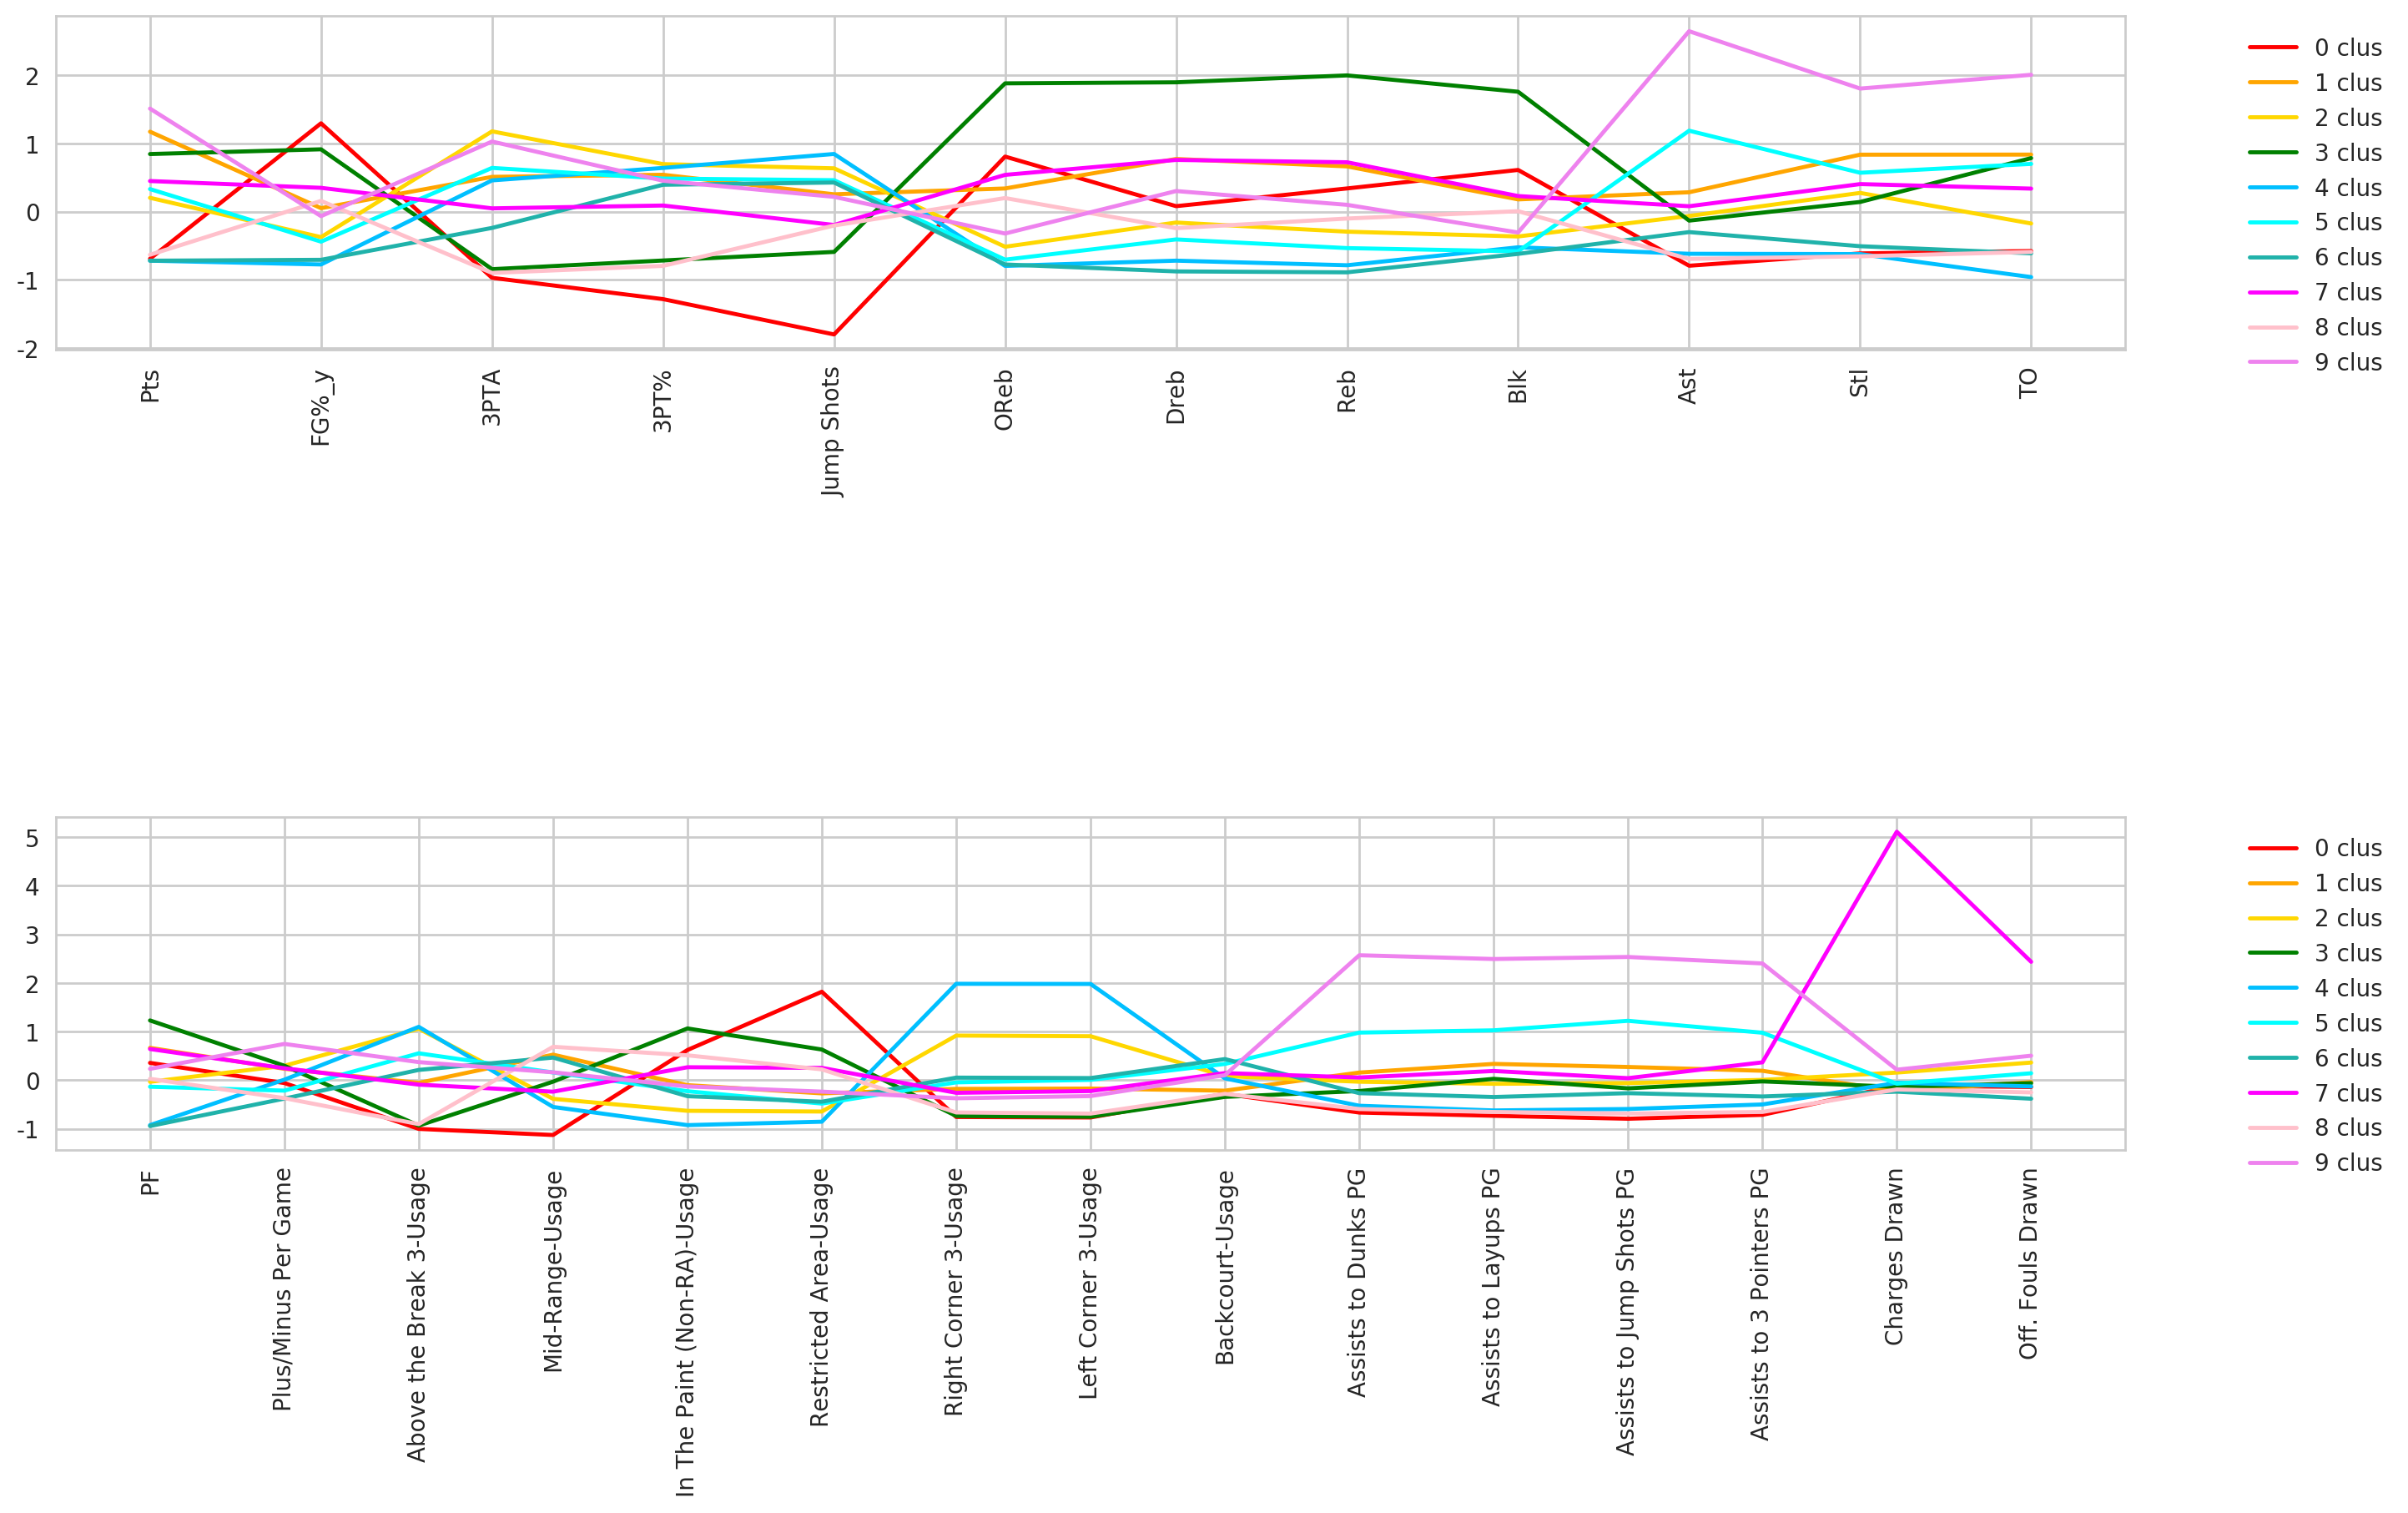

In [25]:
stdDf["cluster"] = model
cluster_plot(stdDf, 10)

In [26]:
data = data.reset_index()
del data["index"]

In [27]:
first_cluster["Player"] = data["Player"]

In [28]:
first_cluster["Season"] = data["Season"]

In [29]:
first_cluster["Team"] = data["Team"]

In [30]:
first_cluster["Pos"] = pos

In [31]:
first_cluster.head()

,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn,cluster,Player,Season,Team,Pos
0,35.40,0.450,6.48,0.347,79.52,0.89,4.43,5.31,0.38,4.50,1.84,3.13,2.91,4.00,21.72,44.91,10.45,20.75,1.15,0.87,0.14,0.70,1.08,2.73,1.43,0,12,9,Kobe Bryant,2005-2006,Lakers,SG
1,33.01,0.447,3.10,0.323,69.70,0.61,2.61,3.22,0.14,7.39,1.94,3.44,1.68,-0.04,10.26,41.38,16.08,30.35,0.27,1.65,0.00,1.61,1.31,4.47,1.46,0,44,9,Allen Iverson,2005-2006,Sixers,SG
2,32.09,0.457,5.97,0.386,73.86,1.61,4.89,6.51,0.79,5.48,1.65,2.60,2.08,2.69,23.28,41.75,6.56,27.08,0.39,0.88,0.06,0.37,1.57,3.53,1.61,0,0,9,Tracy McGrady,2002-2003,Magic,SG
3,32.01,0.503,6.06,0.391,77.49,0.72,6.67,7.38,0.73,5.49,1.27,3.52,2.15,6.28,27.43,30.15,16.29,24.47,1.13,0.47,0.06,1.17,1.07,3.25,1.41,0,8,9,Kevin Durant,2013-2014,Thunder,SG
4,31.58,0.425,7.20,0.343,70.21,1.72,9.00,10.72,0.38,10.38,1.67,5.38,2.35,3.10,27.73,30.67,8.61,30.67,0.72,1.55,0.05,2.40,3.22,4.77,2.56,3,9,9,Russell Westbrook,2016-2017,Thunder,PG


In [32]:
first_cluster[first_cluster["Player"]=="Kobe Bryant"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
790,Kobe Bryant,Lakers,2015-2016,17.59,7.06,3.74,0.20,2.79,0.94,1.97,5
234,Kobe Bryant,Lakers,2014-2015,22.34,5.26,5.69,0.20,5.63,1.34,3.66,9
50,Kobe Bryant,Lakers,2012-2013,27.35,5.22,5.55,0.32,6.01,1.36,3.68,9
40,Kobe Bryant,Lakers,2011-2012,27.86,4.95,5.40,0.31,4.55,1.19,3.52,9
106,Kobe Bryant,Lakers,2010-2011,25.34,4.34,5.11,0.15,4.73,1.21,2.96,9
61,Kobe Bryant,Lakers,2009-2010,26.99,4.12,5.36,0.27,5.00,1.55,3.19,9
64,Kobe Bryant,Lakers,2008-2009,26.84,4.10,5.23,0.45,4.87,1.46,2.56,9
31,Kobe Bryant,Lakers,2007-2008,28.33,5.06,6.30,0.49,5.38,1.84,3.13,9
5,Kobe Bryant,Lakers,2006-2007,31.56,5.17,5.70,0.47,5.36,1.44,3.31,9
0,Kobe Bryant,Lakers,2005-2006,35.40,6.48,5.31,0.38,4.50,1.84,3.13,9


In [33]:
first_cluster[first_cluster["Player"]=="Draymond Green"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
2744,Draymond Green,Warriors,2016-2017,10.21,3.47,7.88,1.39,6.99,2.04,2.42,9
1520,Draymond Green,Warriors,2015-2016,13.96,3.19,9.44,1.37,7.37,1.46,3.20,9
2230,Draymond Green,Warriors,2014-2015,11.66,4.16,8.19,1.27,3.68,1.56,1.68,7
4771,Draymond Green,Warriors,2013-2014,6.23,2.01,4.99,0.88,1.85,1.24,1.11,2
6702,Draymond Green,Warriors,2012-2013,2.87,0.85,3.29,0.32,0.67,0.53,0.65,6


In [34]:
first_cluster[first_cluster["Player"]=="Stephen Curry"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
107,Stephen Curry,Warriors,2016-2017,25.30,9.99,4.48,0.23,6.62,1.81,3.01,9
12,Stephen Curry,Warriors,2015-2016,30.06,11.23,5.44,0.19,6.67,2.14,3.30,9
160,Stephen Curry,Warriors,2014-2015,23.75,8.08,4.28,0.20,7.74,2.04,3.11,9
153,Stephen Curry,Warriors,2013-2014,24.01,7.88,4.28,0.18,8.55,1.63,3.77,9
202,Stephen Curry,Warriors,2012-2013,22.90,7.69,4.03,0.15,6.90,1.62,3.08,9
651,Stephen Curry,Warriors,2010-2011,18.55,4.62,3.86,0.27,5.84,1.47,3.05,9
811,Stephen Curry,Warriors,2009-2010,17.49,4.75,4.45,0.24,5.90,1.90,3.04,9


In [35]:
first_cluster[first_cluster["Player"]=="Kevin Durant"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
119,Kevin Durant,Warriors,2016-2017,25.08,5.03,8.27,1.60,4.85,1.08,2.23,9
33,Kevin Durant,Thunder,2015-2016,28.18,6.67,8.19,1.18,5.00,0.94,3.47,9
3,Kevin Durant,Thunder,2013-2014,32.01,6.06,7.38,0.73,5.49,1.27,3.52,9
36,Kevin Durant,Thunder,2012-2013,28.15,4.12,7.90,1.30,4.62,1.43,3.46,9
37,Kevin Durant,Thunder,2011-2012,28.03,5.21,7.98,1.17,3.50,1.33,3.76,1
41,Kevin Durant,Thunder,2010-2011,27.71,5.31,6.83,0.97,2.74,1.13,2.79,1
11,Kevin Durant,Thunder,2009-2010,30.15,4.28,7.60,1.02,2.82,1.37,3.30,1
108,Kevin Durant,Thunder,2008-2009,25.28,3.11,6.51,0.72,2.77,1.30,3.04,1
428,Kevin Durant,SuperSonics,2007-2008,20.30,2.56,4.35,0.94,2.40,0.98,2.90,1


In [36]:
first_cluster[first_cluster["Player"]=="Tim Duncan"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
3504,Tim Duncan,Spurs,2015-2016,8.56,0.03,7.34,1.31,2.67,0.77,1.48,3
1539,Tim Duncan,Spurs,2014-2015,13.90,0.09,9.16,1.95,2.99,0.82,1.71,3
1255,Tim Duncan,Spurs,2013-2014,15.12,0.07,9.76,1.88,2.97,0.58,2.15,3
761,Tim Duncan,Spurs,2012-2013,17.78,0.10,9.94,2.65,2.67,0.72,2.13,3
1194,Tim Duncan,Spurs,2011-2012,15.43,0.07,8.97,1.52,2.28,0.66,1.67,3
1657,Tim Duncan,Spurs,2010-2011,13.45,0.05,8.92,1.92,2.67,0.66,1.61,3
752,Tim Duncan,Spurs,2009-2010,17.88,0.14,10.10,1.50,3.15,0.58,1.79,3
545,Tim Duncan,Spurs,2008-2009,19.33,0.03,10.67,1.68,3.52,0.51,2.20,3
544,Tim Duncan,Spurs,2007-2008,19.33,0.05,11.29,1.95,2.79,0.72,2.28,3
476,Tim Duncan,Spurs,2006-2007,19.99,0.11,10.58,2.38,3.41,0.83,2.80,3


In [37]:
first_cluster[first_cluster["Player"]=="Shaquille O'Neal"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
3200,Shaquille O'Neal,Celtics,2010-2011,9.22,0.00,4.81,1.14,0.70,0.43,1.51,0
2091,Shaquille O'Neal,Cavaliers,2009-2010,12.00,0.02,6.70,1.17,1.51,0.28,1.98,0
763,Shaquille O'Neal,Suns,2008-2009,17.77,0.01,8.44,1.44,1.68,0.65,2.24,3
1610,Shaquille O'Neal,"Heat, Suns",2007-2008,13.64,0.00,9.08,1.44,1.52,0.52,2.97,3
845,Shaquille O'Neal,Heat,2006-2007,17.25,0.00,7.43,1.38,1.98,0.20,2.38,3
471,Shaquille O'Neal,Heat,2005-2006,20.02,0.00,9.17,1.76,1.92,0.39,2.85,3
206,Shaquille O'Neal,Heat,2004-2005,22.86,0.00,10.41,2.34,2.74,0.49,2.78,3
315,Shaquille O'Neal,Lakers,2003-2004,21.48,0.00,11.48,2.48,2.93,0.51,2.91,3
45,Shaquille O'Neal,Lakers,2002-2003,27.48,0.00,11.07,2.37,3.07,0.57,2.93,3
54,Shaquille O'Neal,Lakers,2001-2002,27.19,0.01,10.67,2.04,2.99,0.61,2.55,3


In [46]:
first_cluster[first_cluster["Player"]=="Kevin Love"][["Player", "Team","Season", "Pts", "3PTA", "Reb", "Blk", "Ast", "Stl", "TO", "cluster"]].sort_values(by="Season", ascending=False)

,Player,Team,Season,Pts,3PTA,Reb,Blk,Ast,Stl,TO,cluster
583,Kevin Love,Cavaliers,2016-2017,19.03,6.48,11.13,0.40,1.95,0.87,2.03,1
1084,Kevin Love,Cavaliers,2015-2016,16.03,5.70,9.90,0.53,2.43,0.75,1.84,2
1023,Kevin Love,Cavaliers,2014-2015,16.37,5.23,9.72,0.53,2.24,0.68,1.63,1
83,Kevin Love,Timberwolves,2013-2014,26.10,6.56,12.51,0.45,4.44,0.77,2.53,7
85,Kevin Love,Timberwolves,2011-2012,26.04,5.13,13.35,0.51,2.02,0.85,2.33,3
437,Kevin Love,Timberwolves,2010-2011,20.22,2.89,15.23,0.38,2.52,0.62,2.12,7
1496,Kevin Love,Timberwolves,2009-2010,14.03,1.77,10.97,0.38,2.27,0.72,1.95,3
2428,Kevin Love,Timberwolves,2008-2009,11.10,0.23,9.06,0.62,1.04,0.43,1.46,3


In [44]:
first_cluster[first_cluster["cluster"]==7].sort_values(by="Pts", ascending=False)

,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn,cluster,Player,Season,Team,Pos
62,26.97,0.452,5.06,0.360,61.84,2.08,8.96,11.04,1.32,4.63,1.39,3.74,3.86,-0.35,24.25,18.03,16.07,40.46,0.28,0.49,0.42,0.38,1.38,2.88,1.86,23,33,7,DeMarcus Cousins,2016-2017,"Kings, Pelicans",C
63,26.89,0.451,3.23,0.333,58.18,2.43,9.03,11.46,1.40,3.29,1.55,3.83,3.63,0.65,15.17,19.89,20.35,43.99,0.23,0.30,0.08,0.46,1.18,1.65,1.11,29,42,7,DeMarcus Cousins,2015-2016,Kings,C
83,26.10,0.457,6.56,0.376,73.98,2.91,9.60,12.51,0.45,4.44,0.77,2.53,1.77,4.64,31.79,22.71,13.92,27.85,0.63,2.74,0.35,0.53,1.83,2.08,0.75,19,32,7,Kevin Love,2013-2014,Timberwolves,PF
149,24.13,0.528,0.55,0.273,56.36,2.40,7.06,9.46,0.64,3.86,1.15,2.80,3.31,7.15,1.84,34.14,14.72,47.90,0.44,0.88,0.07,0.93,0.76,2.18,1.19,19,43,7,Blake Griffin,2013-2014,Clippers,PF
152,24.08,0.467,0.14,0.250,55.25,3.14,9.53,12.66,1.76,3.56,1.53,4.31,4.08,1.05,0.66,31.71,17.45,50.09,0.00,0.09,0.00,0.59,0.85,2.12,1.51,34,49,7,DeMarcus Cousins,2014-2015,Kings,C
184,23.16,0.443,7.61,0.399,69.03,0.56,3.41,3.96,0.25,5.49,1.09,2.13,1.51,2.41,38.14,20.21,6.28,32.07,1.52,1.59,0.21,0.56,1.35,3.58,1.94,26,51,7,Kemba Walker,2016-2017,Hornets,PG
186,23.14,0.418,6.98,0.372,82.11,0.98,5.98,6.95,0.36,4.06,1.88,3.27,2.84,2.25,29.16,33.10,9.42,18.63,4.43,5.26,0.00,0.63,1.41,2.02,0.89,13,35,7,Paul George,2015-2016,Pacers,SG
209,22.73,0.496,0.10,0.000,58.77,3.07,8.63,11.70,1.28,2.92,1.54,3.54,3.80,-0.28,0.59,30.06,23.68,45.68,0.00,0.00,0.00,0.41,0.93,1.58,0.87,39,52,7,DeMarcus Cousins,2013-2014,Kings,C
222,22.50,0.506,0.29,0.292,54.97,3.29,8.77,12.06,0.55,3.80,0.77,2.72,3.07,-1.78,1.38,26.82,20.64,50.80,0.07,0.07,0.22,0.32,0.87,2.57,1.44,25,46,7,Blake Griffin,2010-2011,Clippers,PF
290,21.71,0.424,6.25,0.364,78.49,0.80,5.98,6.78,0.28,3.54,1.89,2.80,2.48,4.64,28.66,30.57,10.29,22.48,3.97,3.67,0.37,0.18,0.88,2.49,0.80,14,40,7,Paul George,2013-2014,Pacers,SG


In [66]:
season = np.unique(first_cluster["Season"])
season

array(['1996-1997', '1997-1998', '1998-1999', '1999-2000', '2000-2001',
       '2001-2002', '2002-2003', '2003-2004', '2004-2005', '2005-2006',
       '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017'], dtype=object)

In [90]:
season0 = pd.DataFrame(first_cluster[first_cluster["Season"]=="1996-1997"]["cluster"].value_counts().sort_index())

for i in season[1:]:
    a = pd.DataFrame(first_cluster[first_cluster["Season"]==i]["cluster"].value_counts().sort_index())
    season0 = pd.concat([season0, a], axis=1)
    
season0.columns = season

In [95]:
season0.loc["sum", :] = season0.sum()

In [98]:
# 이전 시대에는 7번 포지션이 없었다! 주목 해볼만함 ! 
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
0,45.0,28.0,27.0,34.0,33.0,39.0,40.0,37.0,43.0,46.0,49.0,42.0,43.0,39.0,42.0,46.0,36.0,39.0,42.0,41.0,39.0
1,45.0,39.0,33.0,46.0,36.0,36.0,40.0,30.0,34.0,33.0,30.0,28.0,34.0,30.0,11.0,18.0,12.0,17.0,17.0,15.0,25.0
2,12.0,25.0,22.0,34.0,23.0,30.0,22.0,20.0,31.0,36.0,35.0,37.0,35.0,47.0,56.0,49.0,58.0,61.0,71.0,69.0,66.0
3,46.0,48.0,39.0,36.0,39.0,34.0,29.0,36.0,33.0,28.0,31.0,31.0,38.0,37.0,32.0,24.0,30.0,31.0,26.0,29.0,17.0
4,4.0,8.0,16.0,16.0,18.0,10.0,15.0,23.0,27.0,30.0,38.0,30.0,44.0,38.0,35.0,44.0,52.0,44.0,47.0,46.0,59.0
5,22.0,29.0,24.0,23.0,29.0,33.0,31.0,39.0,34.0,35.0,40.0,39.0,37.0,42.0,31.0,40.0,26.0,36.0,34.0,37.0,35.0
6,62.0,61.0,55.0,47.0,60.0,62.0,69.0,66.0,69.0,47.0,49.0,51.0,40.0,41.0,44.0,46.0,43.0,35.0,47.0,58.0,54.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,14.0,21.0,20.0,16.0,12.0,14.0
8,36.0,60.0,52.0,57.0,64.0,54.0,56.0,64.0,54.0,52.0,41.0,43.0,40.0,38.0,45.0,33.0,37.0,31.0,37.0,27.0,21.0
9,23.0,20.0,17.0,21.0,20.0,19.0,18.0,14.0,18.0,18.0,21.0,25.0,22.0,18.0,24.0,21.0,31.0,25.0,23.0,23.0,25.0


In [155]:
naming2 = naming + ["sum"]

In [157]:
season0 = season0.fillna(0)
season0.astype(int)
season0.index = naming2
season0

,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
Non-Scoring Big,45.0,28.0,27.0,34.0,33.0,39.0,40.0,37.0,43.0,46.0,49.0,42.0,43.0,39.0,42.0,46.0,36.0,39.0,42.0,41.0,39.0
Mid-range Monster,45.0,39.0,33.0,46.0,36.0,36.0,40.0,30.0,34.0,33.0,30.0,28.0,34.0,30.0,11.0,18.0,12.0,17.0,17.0,15.0,25.0
Defensive Shooter,12.0,25.0,22.0,34.0,23.0,30.0,22.0,20.0,31.0,36.0,35.0,37.0,35.0,47.0,56.0,49.0,58.0,61.0,71.0,69.0,66.0
Aggressive Tanker,46.0,48.0,39.0,36.0,39.0,34.0,29.0,36.0,33.0,28.0,31.0,31.0,38.0,37.0,32.0,24.0,30.0,31.0,26.0,29.0,17.0
Wing Shooter,4.0,8.0,16.0,16.0,18.0,10.0,15.0,23.0,27.0,30.0,38.0,30.0,44.0,38.0,35.0,44.0,52.0,44.0,47.0,46.0,59.0
All-round Shooter,22.0,29.0,24.0,23.0,29.0,33.0,31.0,39.0,34.0,35.0,40.0,39.0,37.0,42.0,31.0,40.0,26.0,36.0,34.0,37.0,35.0
Backup-Shooter,62.0,61.0,55.0,47.0,60.0,62.0,69.0,66.0,69.0,47.0,49.0,51.0,40.0,41.0,44.0,46.0,43.0,35.0,47.0,58.0,54.0
Point Big,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,14.0,21.0,20.0,16.0,12.0,14.0
Back-up Big,36.0,60.0,52.0,57.0,64.0,54.0,56.0,64.0,54.0,52.0,41.0,43.0,40.0,38.0,45.0,33.0,37.0,31.0,37.0,27.0,21.0
All-round Player,23.0,20.0,17.0,21.0,20.0,19.0,18.0,14.0,18.0,18.0,21.0,25.0,22.0,18.0,24.0,21.0,31.0,25.0,23.0,23.0,25.0


## 전체 시즌, 전체 포지션의 흐름

In [150]:
# 각 시즌 전체 선수에 따른 해당 클러스터의 비율 
season1 = season0.iloc[:10,0:] / season0.loc["sum"]

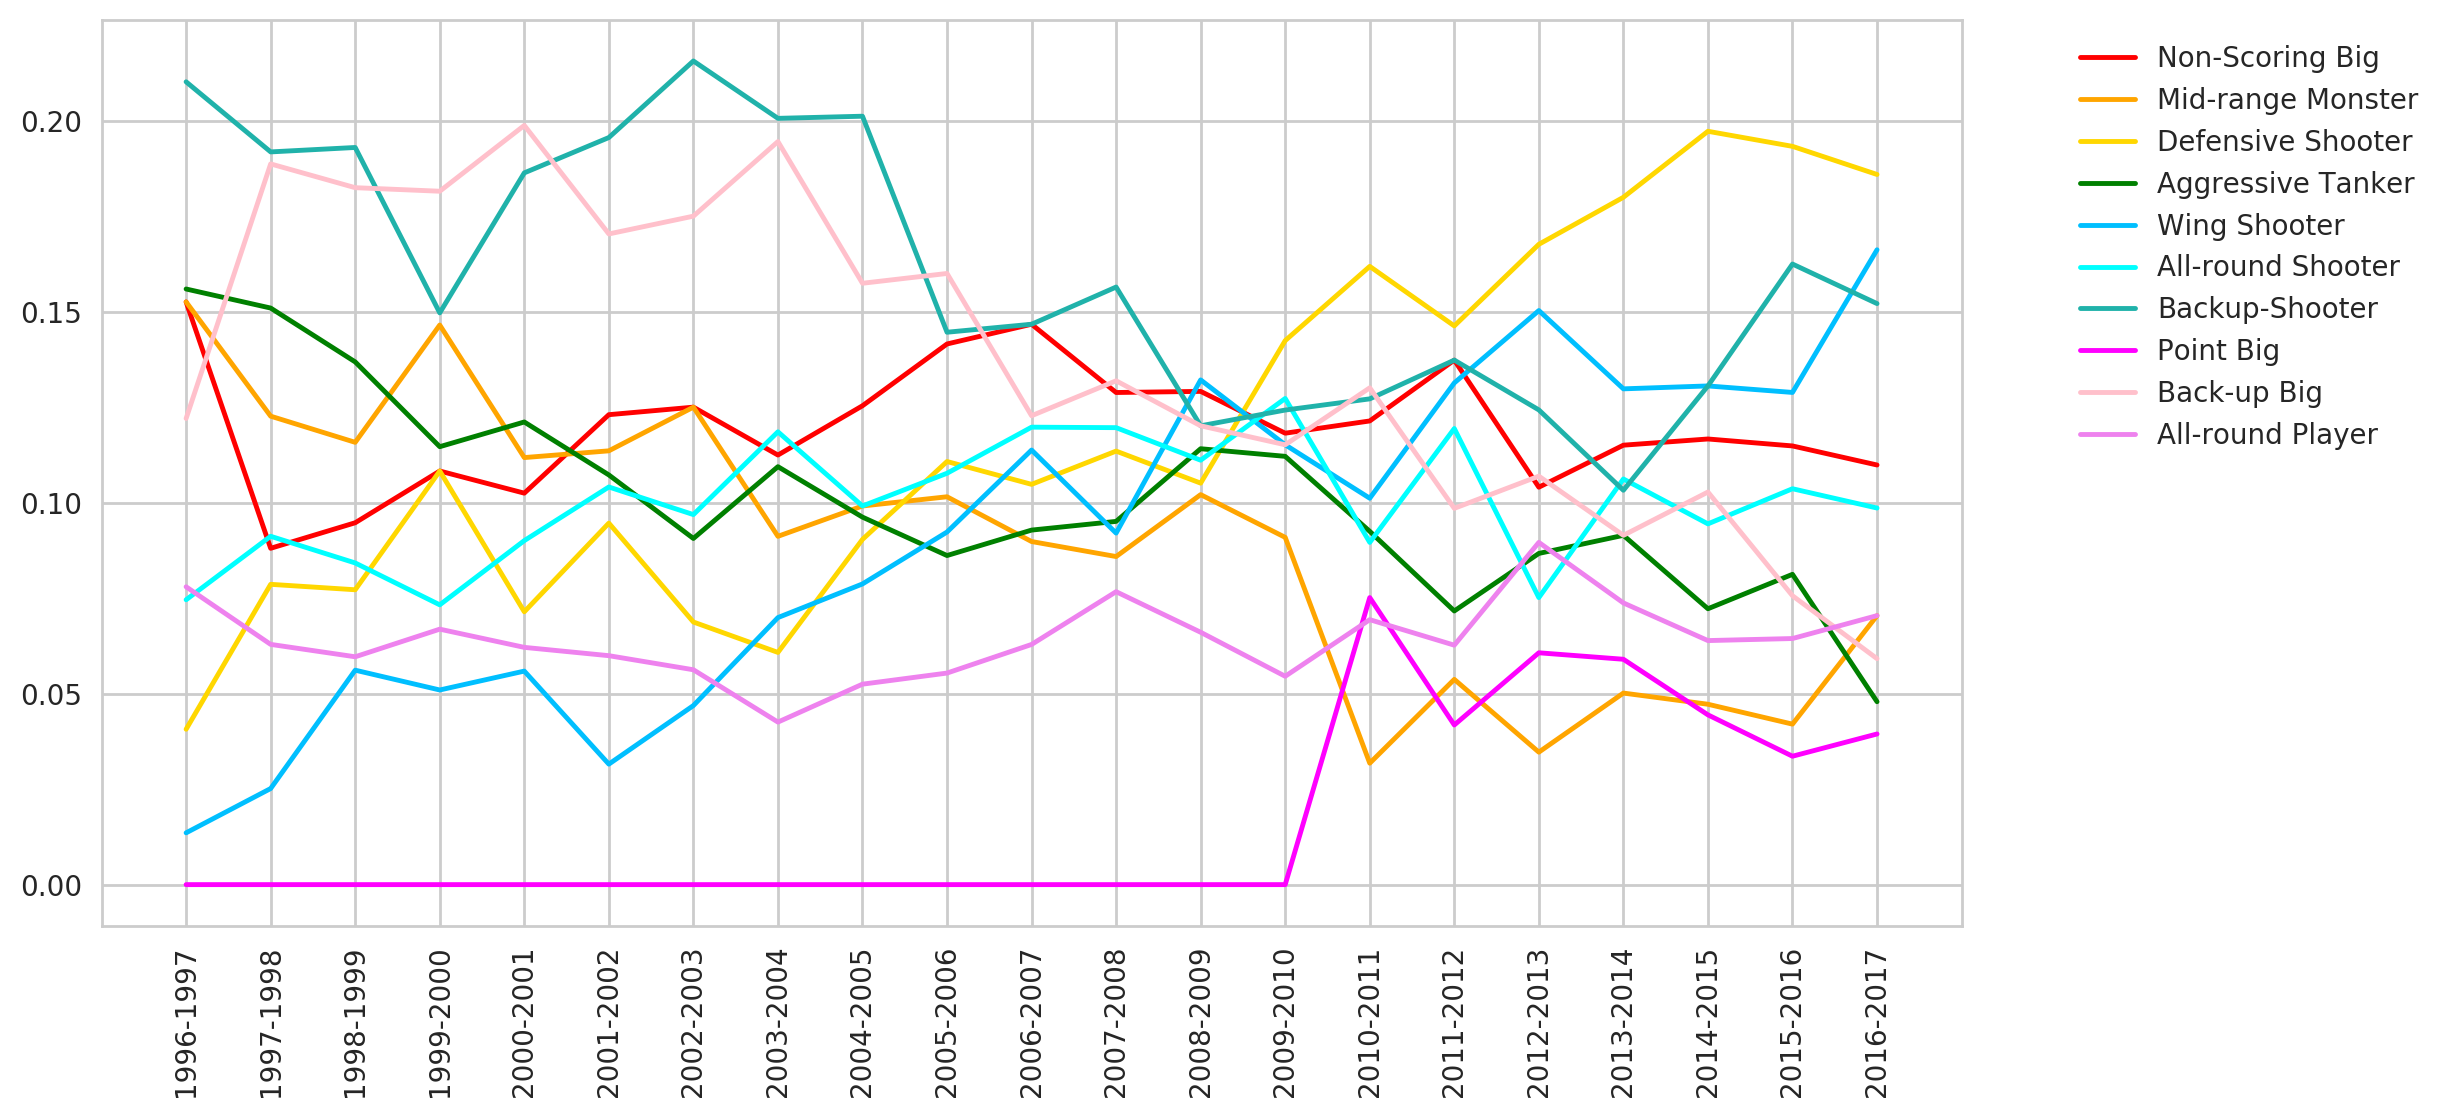

In [151]:
color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "violet", "grey", "lime", "navy", "olive"]

plt.figure(figsize=(12,6), dpi=200)

for i in range(10):
    plt.plot(np.array(season1.iloc[i,:]), color=color[i], label = naming[i])

plt.xticks(range(21), season1.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### 크게 보면 4가지 흐름을 볼 수 있다

1. Point Big 의 증가
2. Aggressive tanker, Mid-range Monster 가 감소하는 경향 ( 통계 지표 어쩌고 저쩌고 사용 )
3. Defensive Shooter, Wing Shooter 의 증가 
4. 애매한 위치의 Back-up 포지션들이 줄어들고 확실한 특성을 나타내는 포지션이 증가하는 경향 

## 비슷한 유형의 포지션 비교 (Big)

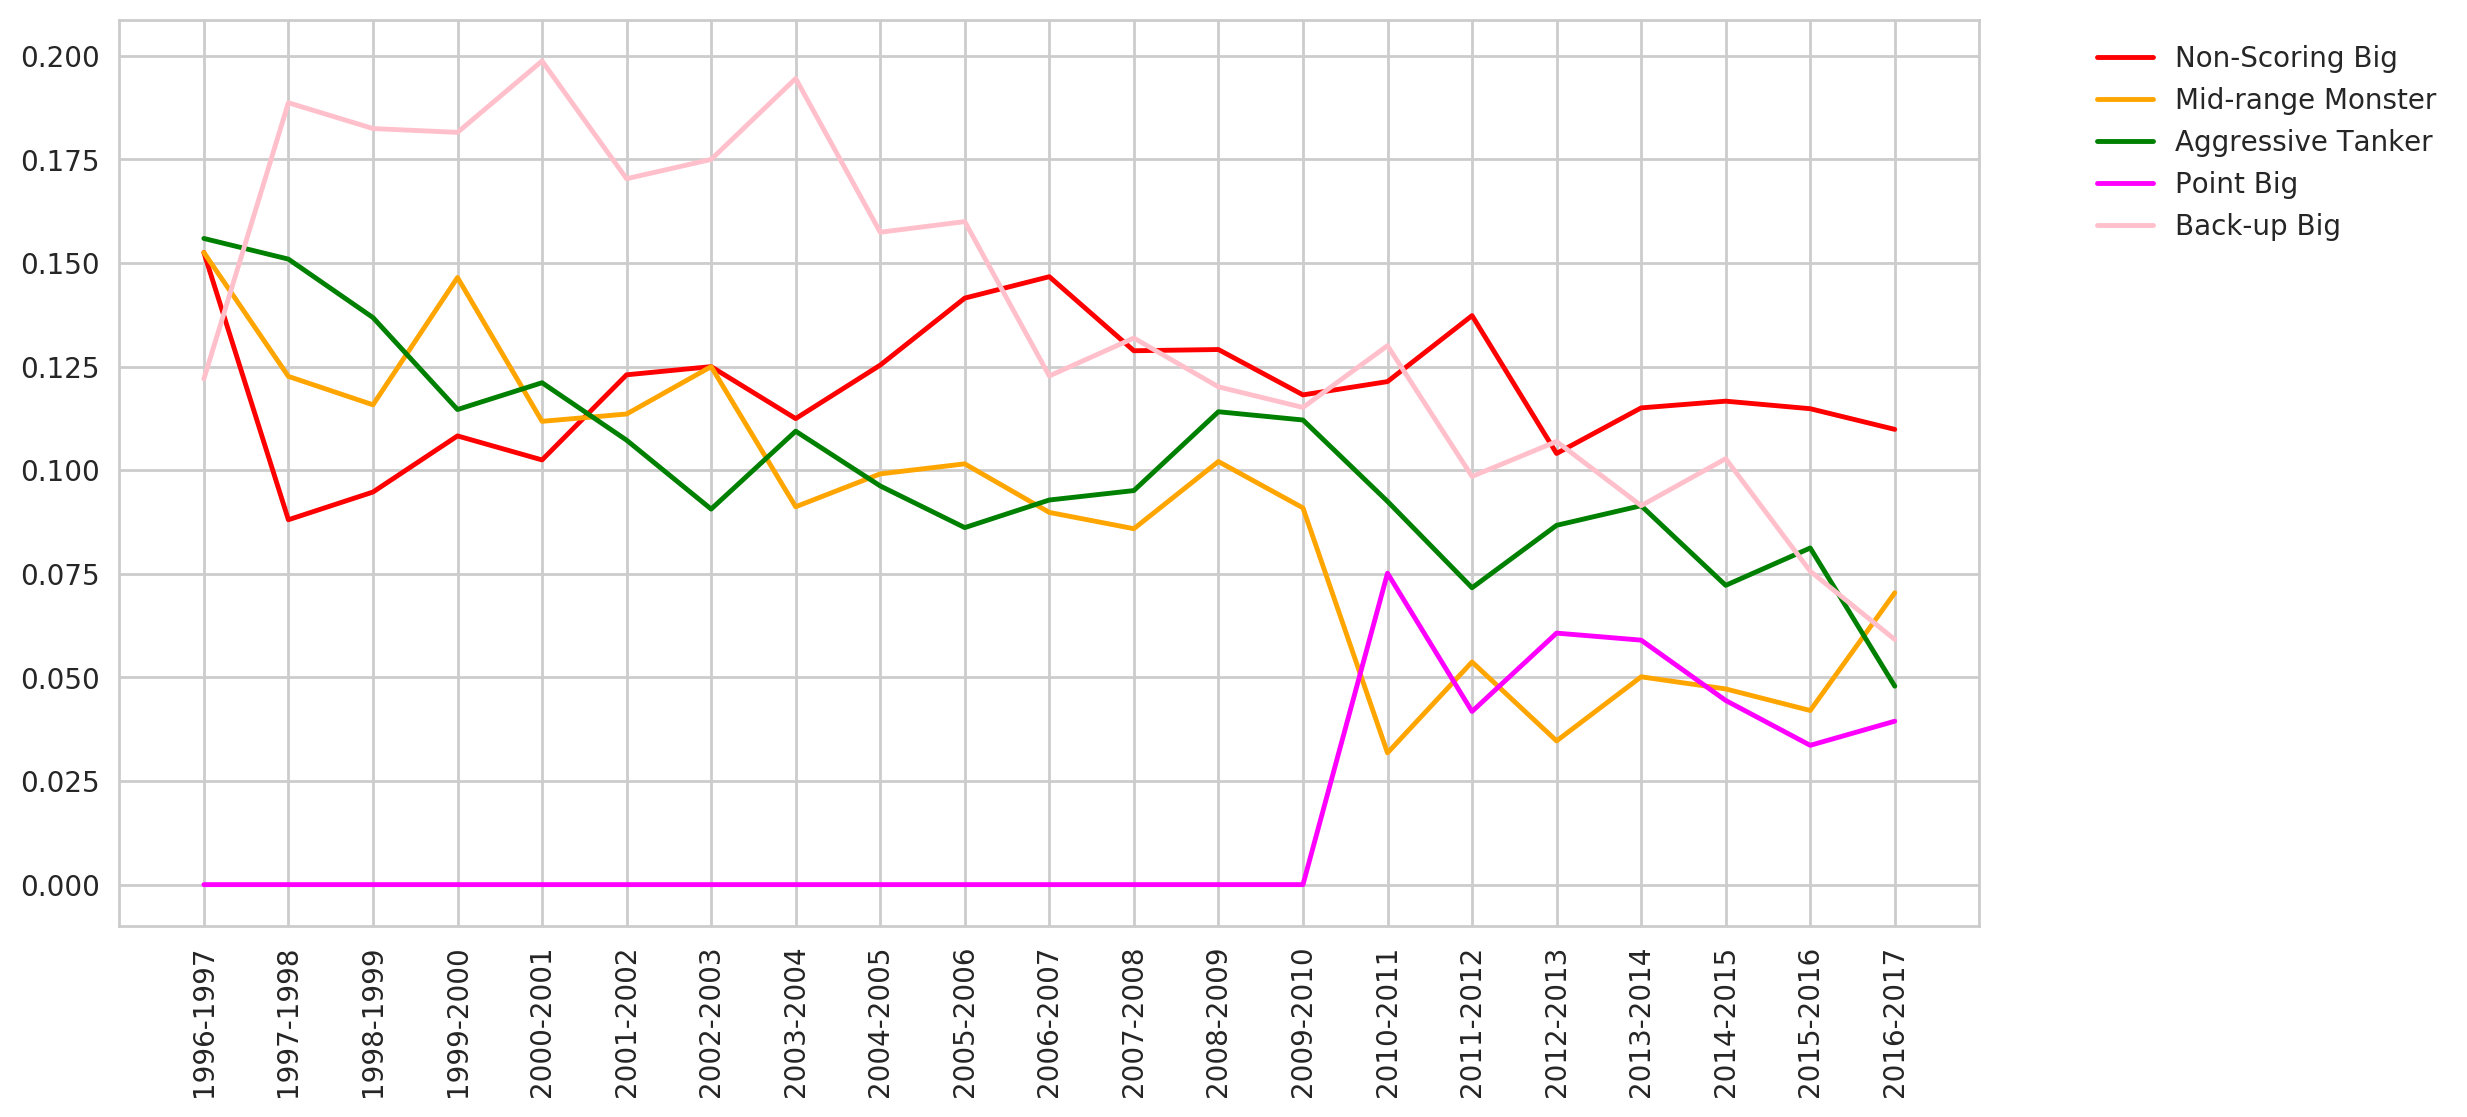

In [159]:
plt.figure(figsize=(12,6), dpi=200)

big = [0,1,3,7,8]

for i in big:
    plt.plot(np.array(season1.iloc[i,:]), color=color[i], label = naming[i])

plt.xticks(range(21), season1.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 비슷한 유형의 포지션 비교 (Shooter)

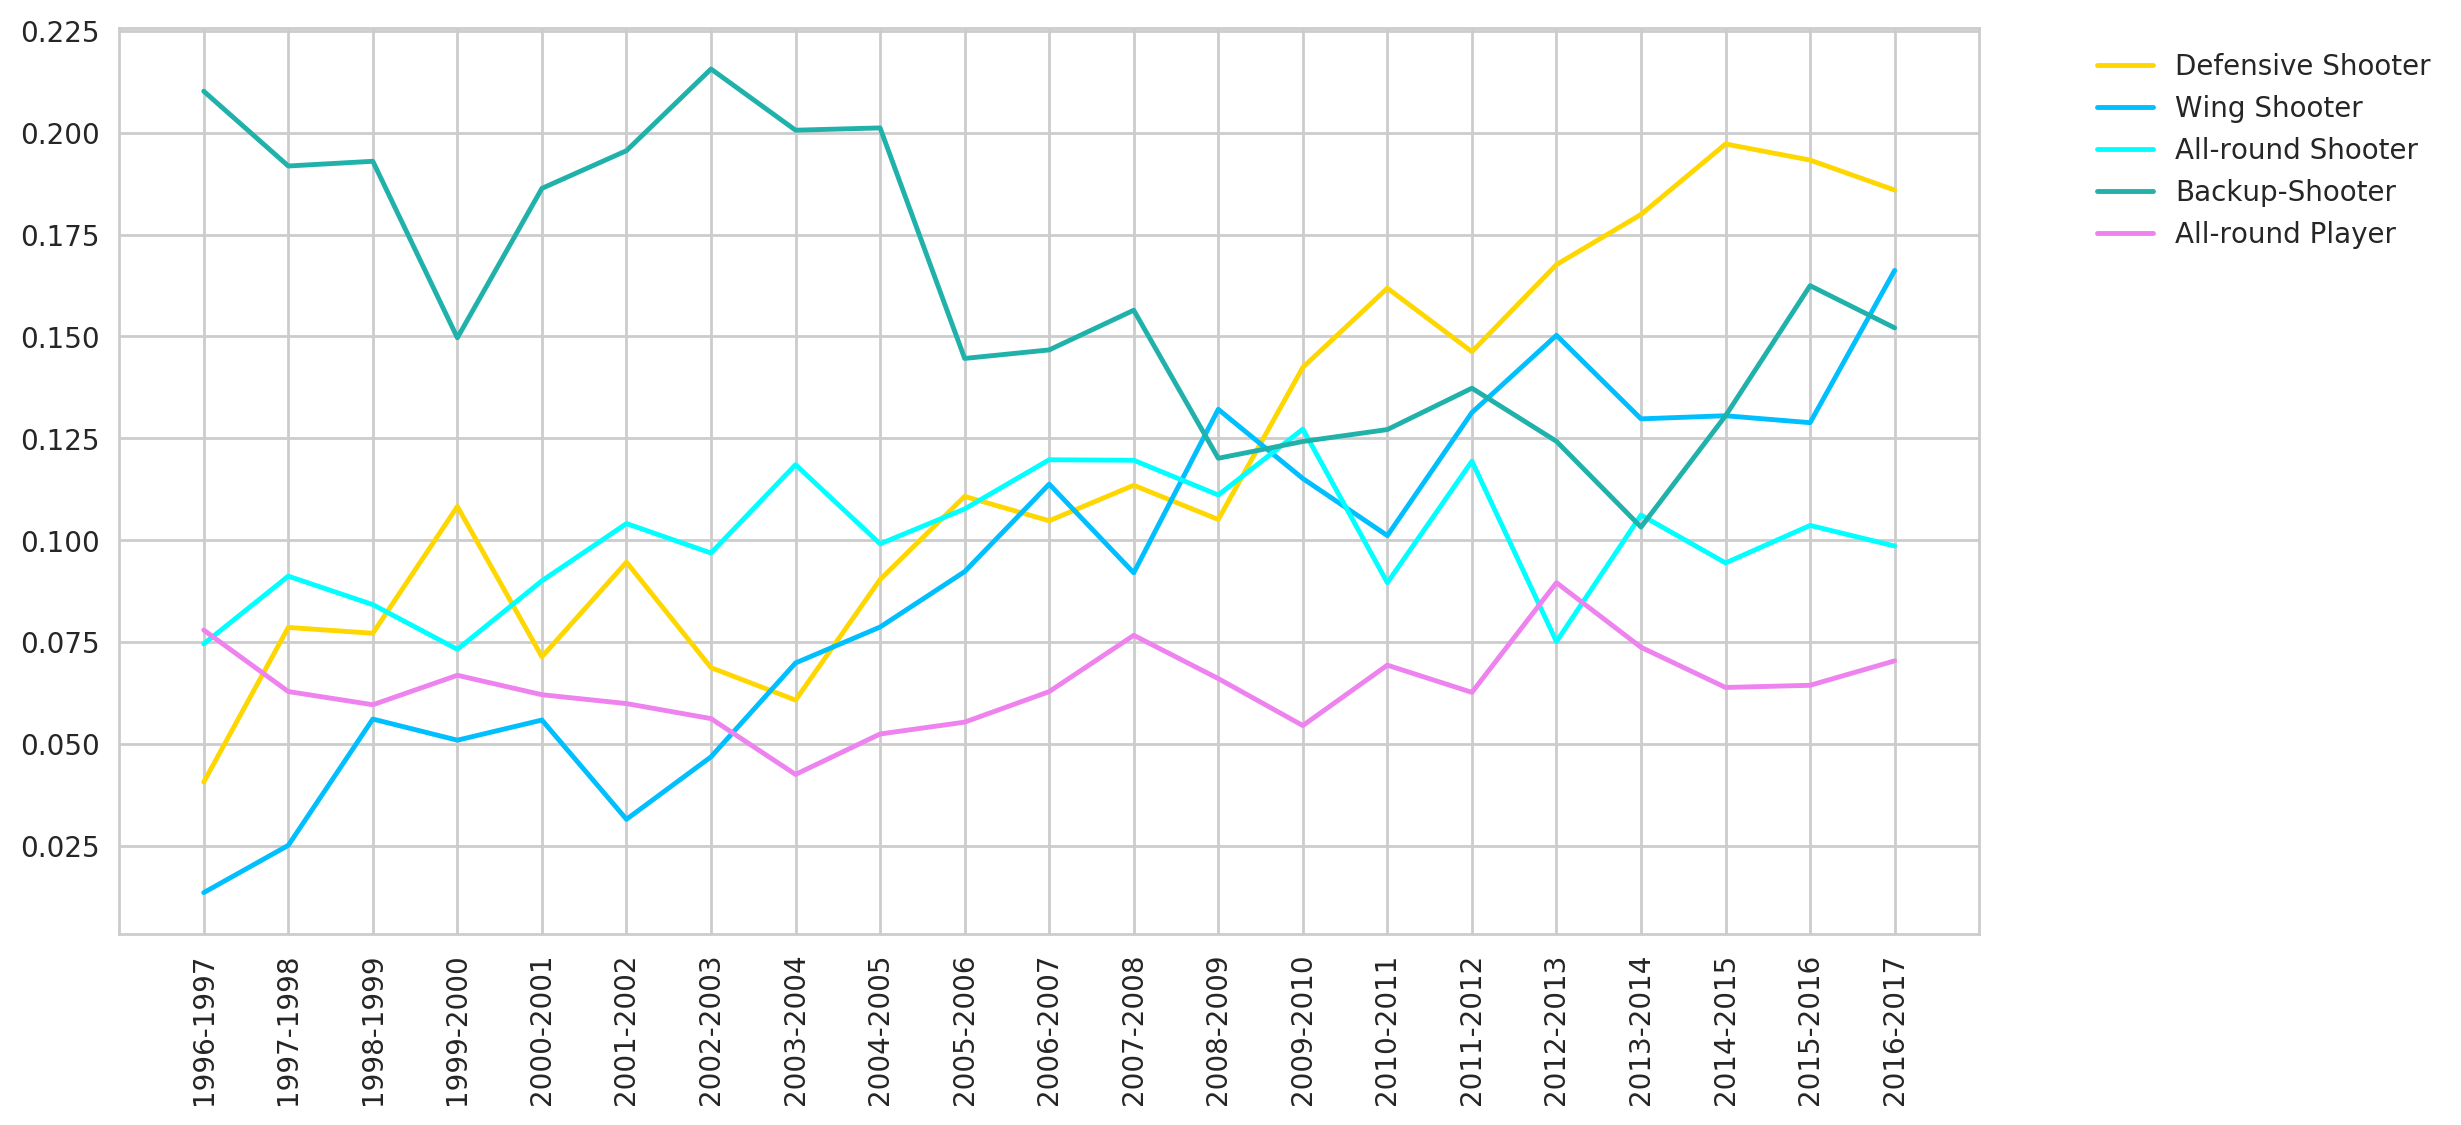

In [160]:
plt.figure(figsize=(12,6), dpi=200)

shoot = [2,4,5,6,9]

for i in shoot:
    plt.plot(np.array(season1.iloc[i,:]), color=color[i], label = naming[i])

plt.xticks(range(21), season1.columns, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [162]:
first_cluster.head()

,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn,cluster,Player,Season,Team,Pos
0,35.40,0.450,6.48,0.347,79.52,0.89,4.43,5.31,0.38,4.50,1.84,3.13,2.91,4.00,21.72,44.91,10.45,20.75,1.15,0.87,0.14,0.70,1.08,2.73,1.43,0,12,9,Kobe Bryant,2005-2006,Lakers,SG
1,33.01,0.447,3.10,0.323,69.70,0.61,2.61,3.22,0.14,7.39,1.94,3.44,1.68,-0.04,10.26,41.38,16.08,30.35,0.27,1.65,0.00,1.61,1.31,4.47,1.46,0,44,9,Allen Iverson,2005-2006,Sixers,SG
2,32.09,0.457,5.97,0.386,73.86,1.61,4.89,6.51,0.79,5.48,1.65,2.60,2.08,2.69,23.28,41.75,6.56,27.08,0.39,0.88,0.06,0.37,1.57,3.53,1.61,0,0,9,Tracy McGrady,2002-2003,Magic,SG
3,32.01,0.503,6.06,0.391,77.49,0.72,6.67,7.38,0.73,5.49,1.27,3.52,2.15,6.28,27.43,30.15,16.29,24.47,1.13,0.47,0.06,1.17,1.07,3.25,1.41,0,8,9,Kevin Durant,2013-2014,Thunder,SG
4,31.58,0.425,7.20,0.343,70.21,1.72,9.00,10.72,0.38,10.38,1.67,5.38,2.35,3.10,27.73,30.67,8.61,30.67,0.72,1.55,0.05,2.40,3.22,4.77,2.56,3,9,9,Russell Westbrook,2016-2017,Thunder,PG


In [163]:
champ = pd.read_csv("champion.csv")

In [166]:
champ = champ[["year", "team"]]
champ.columns = ["Season", "Team"]

In [167]:
champ

,Season,Team
0,1997-1998,Bulls
1,1998-1999,Spurs
2,1999-2000,Lakers
3,2000-2001,Lakers
4,2001-2002,Lakers
5,2002-2003,Spurs
6,2003-2004,Pistons
7,2004-2005,Spurs
8,2005-2006,Heat
9,2006-2007,Spurs


In [172]:
champ_df = pd.merge(first_cluster, champ, on=["Season", "Team"], how="right")

In [175]:
champ_df.sort_values(by="Season")

,Pts,FG%_y,3PTA,3PT%,Jump Shots,OReb,Dreb,Reb,Blk,Ast,Stl,TO,PF,Plus/Minus Per Game,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Charges Drawn,Off. Fouls Drawn,cluster,Player,Season,Team,Pos
14,7.52,0.454,2.60,0.438,95.29,0.28,1.26,1.54,0.10,1.92,0.52,0.54,1.42,2.42,39.40,48.01,4.64,4.64,2.32,0.99,0.00,0.22,0.20,1.42,0.36,0,0,6,Steve Kerr,1997-1998,Bulls,PG
15,5.20,0.424,1.80,0.354,69.84,1.00,1.48,2.48,0.46,0.81,0.80,0.63,1.64,1.78,23.73,29.60,1.33,31.20,8.27,5.33,0.53,0.10,0.24,0.48,0.16,0,0,4,Scott Burrell,1997-1998,Bulls,SF
13,9.32,0.441,1.02,0.190,54.24,1.30,2.23,3.54,0.59,2.94,1.32,1.11,2.21,5.66,9.62,29.92,11.28,46.17,1.95,1.05,0.00,0.37,0.56,1.90,0.45,0,0,1,Ron Harper,1997-1998,Bulls,SG
12,11.43,0.455,0.00,0.000,61.73,1.95,3.93,5.88,1.07,2.78,0.59,2.24,3.55,4.40,0.00,39.57,20.20,40.23,0.00,0.00,0.00,0.17,1.07,1.48,0.28,0,0,3,Luc Longley,1997-1998,Bulls,C
11,13.27,0.455,2.35,0.362,70.16,1.64,2.78,4.42,0.50,4.24,1.03,2.08,2.01,6.31,17.50,40.48,9.17,29.64,1.67,1.31,0.24,0.49,1.24,2.41,0.47,0,0,1,Toni Kukoc,1997-1998,Bulls,SF
10,19.16,0.448,4.36,0.318,68.61,1.20,3.95,5.16,0.98,5.77,1.80,2.48,2.64,7.36,23.83,32.34,8.23,32.62,1.99,0.99,0.00,0.80,1.27,3.55,0.80,0,0,9,Scottie Pippen,1997-1998,Bulls,SF
9,28.74,0.465,1.54,0.238,76.66,1.59,4.21,5.79,0.55,3.45,1.72,2.26,1.84,7.30,6.34,58.16,11.09,24.14,0.21,0.00,0.05,0.38,1.17,1.89,0.49,0,0,1,Michael Jordan,1997-1998,Bulls,SG
16,4.69,0.431,0.29,0.174,33.52,5.26,9.75,15.01,0.23,2.88,0.59,1.84,2.98,4.33,4.72,20.00,6.11,67.50,1.11,0.56,0.00,0.33,0.69,1.73,0.34,0,0,3,Dennis Rodman,1997-1998,Bulls,PF
17,4.06,0.384,0.07,0.000,58.50,0.48,0.85,1.32,0.17,2.13,1.00,0.89,1.66,0.59,1.32,50.66,5.96,41.72,0.33,0.00,0.00,0.17,0.51,1.39,0.25,0,0,8,Randy Brown,1997-1998,Bulls,PG
151,4.78,0.454,0.37,0.294,67.05,0.28,0.89,1.17,0.13,2.30,0.65,0.96,0.85,2.30,8.74,38.25,18.03,34.43,0.00,0.55,0.00,0.39,0.43,1.35,0.33,0,0,6,Antonio Daniels,1998-1999,Spurs,SG


###  우승팀 조합에 대한 변화 찾기

In [216]:
combination = []
for i in season[1:]:
    temp = np.array(champ_df[champ_df["Season"]==i]["cluster"])
    temp.sort()
    combination.append(temp)

In [217]:
combination

[array([1, 1, 1, 3, 3, 4, 6, 8, 9], dtype=int32),
 array([0, 0, 2, 2, 3, 3, 4, 6, 6, 6, 9], dtype=int32),
 array([1, 1, 1, 2, 2, 2, 3, 6, 8], dtype=int32),
 array([2, 2, 3, 5, 6, 6, 6, 6, 6, 8, 9], dtype=int32),
 array([0, 0, 2, 2, 2, 3, 5, 6, 6, 6, 8, 9], dtype=int32),
 array([1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 8], dtype=int32),
 array([1, 1, 3, 4, 5, 8, 8, 8], dtype=int32),
 array([1, 2, 3, 3, 4, 4, 6, 6, 8, 9], dtype=int32),
 array([0, 2, 2, 2, 3, 4, 5, 6, 6, 8, 8, 9], dtype=int32),
 array([0, 0, 2, 3, 4, 4, 4, 4, 6, 6, 6, 9], dtype=int32),
 array([0, 0, 0, 2, 2, 3, 4, 4, 6, 9, 9], dtype=int32),
 array([2, 2, 3, 3, 3, 4, 6, 6, 8, 9], dtype=int32),
 array([1, 2, 2, 3, 3, 6, 6, 9], dtype=int32),
 array([0, 0, 1, 3, 4, 4, 5, 5, 9], dtype=int32),
 array([0, 1, 2, 4, 4, 4, 6, 7, 9, 9], dtype=int32),
 array([0, 1, 2, 2, 4, 4, 4, 6, 7, 9, 9], dtype=int32),
 array([0, 0, 1, 1, 2, 2, 3, 4, 4, 5, 6, 7], dtype=int32),
 array([0, 0, 2, 2, 2, 3, 4, 6, 7, 7, 8, 9], dtype=int32),
 array([0, 0, 2, 2, 2,